In [57]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [45]:
import tensorflow as tf
from tensorflow import keras

((x_train, y_train), (x_test, y_test)) = keras.datasets.fashion_mnist.load_data()
train_labels=y_train
test_labels=y_test
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# 1- Tensorflow and keras example

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

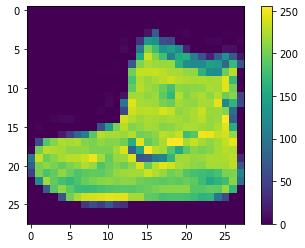

In [20]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [33]:
x_train = x_train / 255.0

x_test = x_test / 255.0

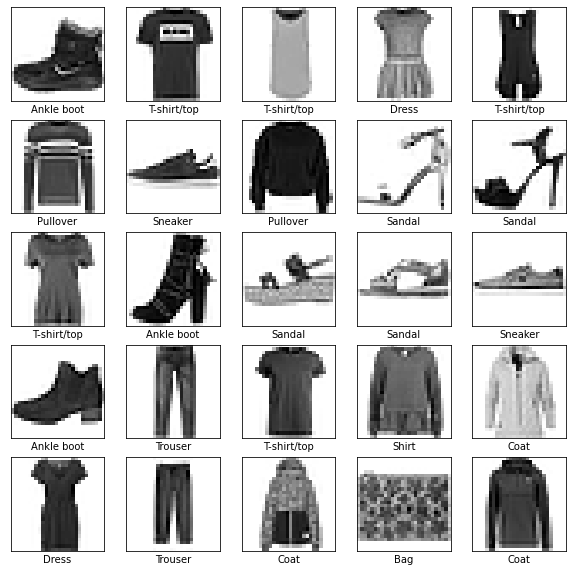

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [73]:
model_example = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [74]:

model_example.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [75]:
model_example.fit(x_train, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 981us/step - loss: 10.0910 - accuracy: 0.6937
Epoch 2/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.6583 - accuracy: 0.7700
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5831 - accuracy: 0.7941
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5406 - accuracy: 0.8128
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5138 - accuracy: 0.8214
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5111 - accuracy: 0.8232
Epoch 7/10
1875/1875 [==============================] - 2s 958us/step - loss: 0.4951 - accuracy: 0.8298
Epoch 8/10
1875/1875 [==============================] - 2s 960us/step - loss: 0.4874 - accuracy: 0.8300
Epoch 9/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.4810 - accuracy: 0.8348
Epoch 10/10
1875/1875 [==============================] - 2s 934us/step 

In [50]:
test_loss, test_acc = model_example.evaluate(x_test,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5259 - accuracy: 0.8276

Test accuracy: 0.8276000022888184


In [51]:
probability_model = tf.keras.Sequential([model_example, tf.keras.layers.Softmax()])

In [52]:
predictions = probability_model.predict(x_test)

In [53]:
predictions[0]

array([1.1815646e-13, 3.7555224e-12, 0.0000000e+00, 2.0427165e-14,
       1.9431144e-34, 6.1140571e-02, 1.1436852e-18, 1.3811921e-01,
       1.5534896e-10, 8.0074030e-01], dtype=float32)

In [55]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

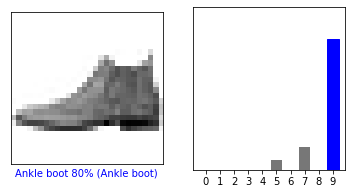

In [58]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

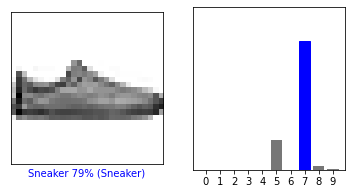

In [59]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

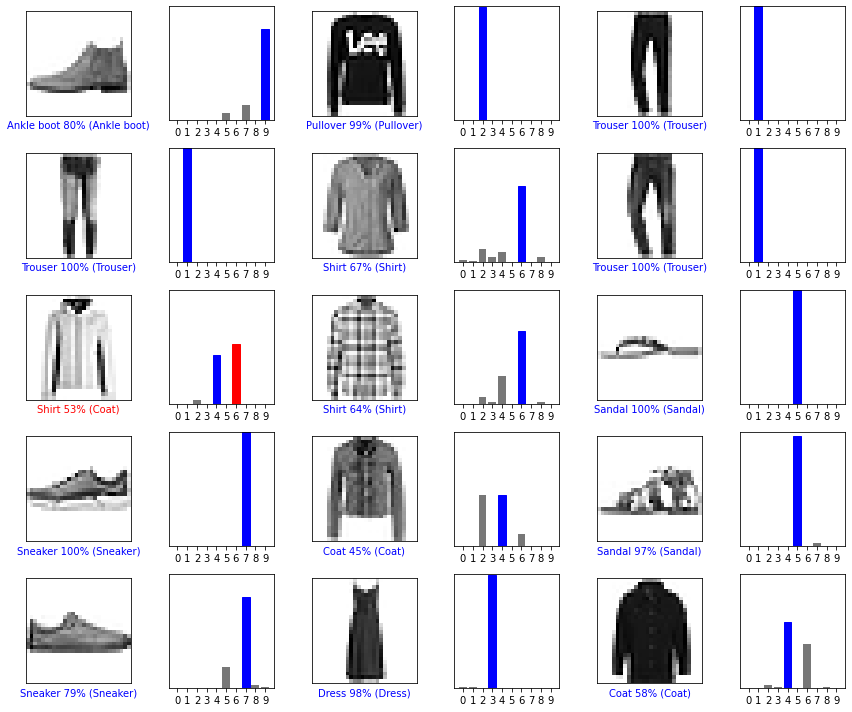

In [61]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [63]:
img = x_test[1]

print(img.shape)

(28, 28)


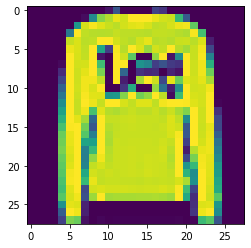

In [67]:
plt.imshow(img)

In [69]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [70]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.2855553e-04 5.7161596e-06 9.9445629e-01 1.1776449e-06 4.5212405e-03
  7.2320844e-35 8.8517158e-04 0.0000000e+00 1.7341704e-06 0.0000000e+00]]


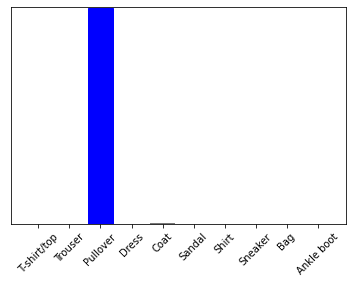

In [71]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# First Deep, Question 1

In [98]:
import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import keras
((x_train, y_train), (x_test, y_test)) = keras.datasets.fashion_mnist.load_data()
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [133]:
# configure the model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='softmax', kernel_initializer='random_normal',bias_initializer='random_normal'))

# compile model
optimizer = keras.optimizers.Adam(lr=1e-5)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [134]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 2s 780us/step - loss: 118.3236 - accuracy: 0.2596
Epoch 2/100
1875/1875 [==============================] - 1s 729us/step - loss: 32.0011 - accuracy: 0.5193
Epoch 3/100
1875/1875 [==============================] - 1s 732us/step - loss: 24.2535 - accuracy: 0.5944
Epoch 4/100
1875/1875 [==============================] - 1s 724us/step - loss: 20.6690 - accuracy: 0.6359
Epoch 5/100
1875/1875 [==============================] - 1s 759us/step - loss: 17.9028 - accuracy: 0.6658
Epoch 6/100
1875/1875 [==============================] - 1s 726us/step - loss: 16.4539 - accuracy: 0.6837
Epoch 7/100
1875/1875 [==============================] - 1s 716us/step - loss: 15.1473 - accuracy: 0.7010
Epoch 8/100
1875/1875 [==============================] - 1s 788us/step - loss: 14.0155 - accuracy: 0.7100
Epoch 9/100
1875/1875 [==============================] - 2s 836us/step - loss: 13.3132 - accuracy: 0.7231
Epoch 10/100
1875/1875 [=====================

In [135]:
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)

1875/1875 - 1s - loss: 3.7072 - accuracy: 0.8118


In [136]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 4.9793 - accuracy: 0.7907


In [137]:
model.save('first_model.model',save_format='h5')

In [138]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Tangent model

In [139]:
import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import keras
((x_train, y_train), (x_test, y_test)) = keras.datasets.fashion_mnist.load_data()
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
# configure the model
model_tanh = Sequential()
model_tanh.add(Flatten(input_shape=(28,28)))
model_tanh.add(Dense(100, activation='tanh',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_tanh.add(Dense(10, activation='softmax', kernel_initializer='random_normal',bias_initializer='random_normal'))

# compile model
optimizer = keras.optimizers.Adam(lr=1e-5)
model_tanh.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [140]:
model_tanh.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1139 - accuracy: 0.3203
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4871 - accuracy: 0.5955
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1904 - accuracy: 0.6774
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0089 - accuracy: 0.7119
Epoch 5/100
1875/1875 [==============================] - 2s 892us/step - loss: 0.8959 - accuracy: 0.7328
Epoch 6/100
1875/1875 [==============================] - 2s 969us/step - loss: 0.8177 - accuracy: 0.7482
Epoch 7/100
1875/1875 [==============================] - 2s 898us/step - loss: 0.7605 - accuracy: 0.7601
Epoch 8/100
1875/1875 [==============================] - 2s 893us/step - loss: 0.7164 - accuracy: 0.7736
Epoch 9/100
1875/1875 [==============================] - 2s 904us/step - loss: 0.6831 - accuracy: 0.7778
Epoch 10/100
1875/1875 [==============================] - 2s 88

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3788 - accuracy: 0.8634
Epoch 80/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3843 - accuracy: 0.8613
Epoch 81/100
1875/1875 [==============================] - 2s 993us/step - loss: 0.3776 - accuracy: 0.8663
Epoch 82/100
1875/1875 [==============================] - 2s 989us/step - loss: 0.3760 - accuracy: 0.8652
Epoch 83/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3768 - accuracy: 0.8644
Epoch 84/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3778 - accuracy: 0.8665
Epoch 85/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3764 - accuracy: 0.8654
Epoch 86/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3769 - accuracy: 0.8657
Epoch 87/100
1875/1875 [==============================] - 2s 997us/step - loss: 0.3668 - accuracy: 0.8704
Epoch 88/100
1875/1875 [==============================] - 2s 997us/step

In [141]:
test_loss, test_acc = model_tanh.evaluate(x_train,  y_train, verbose=2)

1875/1875 - 1s - loss: 0.3571 - accuracy: 0.8720


In [142]:
test_loss, test_acc = model_tanh.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.4478 - accuracy: 0.8388


In [143]:
model_tanh.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.save('tanh_model.model',save_format='h5')

### tangent average

In [118]:
tanh_score=[]
import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import keras
((x_train, y_train), (x_test, y_test)) = keras.datasets.fashion_mnist.load_data()
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
for i in range(10):
    # configure the model
    model_tanh = Sequential()
    model_tanh.add(Flatten(input_shape=(28,28)))
    model_tanh.add(Dense(100, activation='tanh',kernel_initializer='random_normal',bias_initializer='random_normal'))
    model_tanh.add(Dense(10, activation='softmax', kernel_initializer='random_normal',bias_initializer='random_normal'))

    # compile model
    optimizer = keras.optimizers.Adam(lr=1e-5)
    model_tanh.compile(optimizer=optimizer,
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    # Fitting model
    model_tanh.fit(x_train,y_train,epochs=100,batch_size=32)
    test_loss, test_acc = model_tanh.evaluate(x_test,  y_test, verbose=2)
    tanh_score.append(test_acc)


Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0983 - accuracy: 0.2839
Epoch 2/100
1875/1875 [==============================] - 2s 969us/step - loss: 1.4776 - accuracy: 0.6214
Epoch 3/100
1875/1875 [==============================] - 2s 968us/step - loss: 1.1960 - accuracy: 0.6780
Epoch 4/100
1875/1875 [==============================] - 2s 964us/step - loss: 1.0206 - accuracy: 0.7062
Epoch 5/100
1875/1875 [==============================] - 2s 964us/step - loss: 0.9093 - accuracy: 0.7224
Epoch 6/100
1875/1875 [==============================] - 2s 970us/step - loss: 0.8343 - accuracy: 0.7381
Epoch 7/100
1875/1875 [==============================] - 2s 969us/step - loss: 0.7796 - accuracy: 0.7505
Epoch 8/100
1875/1875 [==============================] - 2s 962us/step - loss: 0.7298 - accuracy: 0.7631
Epoch 9/100
1875/1875 [==============================] - 2s 969us/step - loss: 0.6991 - accuracy: 0.7682
Epoch 10/100
1875/1875 [==============================] -

1875/1875 [==============================] - 2s 951us/step - loss: 0.4131 - accuracy: 0.8530
Epoch 56/100
1875/1875 [==============================] - 2s 951us/step - loss: 0.4147 - accuracy: 0.8517
Epoch 57/100
1875/1875 [==============================] - 2s 960us/step - loss: 0.4109 - accuracy: 0.8545
Epoch 58/100
1875/1875 [==============================] - 2s 948us/step - loss: 0.4124 - accuracy: 0.8521
Epoch 59/100
1875/1875 [==============================] - 2s 950us/step - loss: 0.4050 - accuracy: 0.8560
Epoch 60/100
1875/1875 [==============================] - 2s 976us/step - loss: 0.4066 - accuracy: 0.8544
Epoch 61/100
1875/1875 [==============================] - 2s 951us/step - loss: 0.3997 - accuracy: 0.8569
Epoch 62/100
1875/1875 [==============================] - 2s 950us/step - loss: 0.4091 - accuracy: 0.8526
Epoch 63/100
1875/1875 [==============================] - 2s 951us/step - loss: 0.4061 - accuracy: 0.8535
Epoch 64/100
1875/1875 [==============================] - 2

1875/1875 [==============================] - 2s 939us/step - loss: 0.7359 - accuracy: 0.7607
Epoch 9/100
1875/1875 [==============================] - 2s 951us/step - loss: 0.7033 - accuracy: 0.7673
Epoch 10/100
1875/1875 [==============================] - 2s 945us/step - loss: 0.6714 - accuracy: 0.7738
Epoch 11/100
1875/1875 [==============================] - 2s 936us/step - loss: 0.6472 - accuracy: 0.7819
Epoch 12/100
1875/1875 [==============================] - 2s 942us/step - loss: 0.6265 - accuracy: 0.7901
Epoch 13/100
1875/1875 [==============================] - 2s 931us/step - loss: 0.6138 - accuracy: 0.7904
Epoch 14/100
1875/1875 [==============================] - 2s 930us/step - loss: 0.5978 - accuracy: 0.7945
Epoch 15/100
1875/1875 [==============================] - 2s 926us/step - loss: 0.5819 - accuracy: 0.8022
Epoch 16/100
1875/1875 [==============================] - 2s 925us/step - loss: 0.5746 - accuracy: 0.8016
Epoch 17/100
1875/1875 [==============================] - 2s

1875/1875 [==============================] - 2s 944us/step - loss: 0.3731 - accuracy: 0.8674
Epoch 87/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3785 - accuracy: 0.8648
Epoch 88/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3711 - accuracy: 0.8670
Epoch 89/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3737 - accuracy: 0.8649
Epoch 90/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3654 - accuracy: 0.8679
Epoch 91/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3741 - accuracy: 0.8658
Epoch 92/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3643 - accuracy: 0.8702
Epoch 93/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3663 - accuracy: 0.8686
Epoch 94/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3672 - accuracy: 0.8668
Epoch 95/100
1875/1875 [==============================] - 2s 1ms/step - los

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4439 - accuracy: 0.8423
Epoch 42/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4486 - accuracy: 0.8408
Epoch 43/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4361 - accuracy: 0.8441
Epoch 44/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4386 - accuracy: 0.8439
Epoch 45/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4334 - accuracy: 0.8468
Epoch 46/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4289 - accuracy: 0.8468
Epoch 47/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4318 - accuracy: 0.8473
Epoch 48/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4270 - accuracy: 0.8459
Epoch 49/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4259 - accuracy: 0.8476
Epoch 50/100
1875/1875 [==============================] - 2s 1ms/step - loss:

1875/1875 [==============================] - 2s 1ms/step - loss: 0.5525 - accuracy: 0.8094
Epoch 20/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5329 - accuracy: 0.8153
Epoch 21/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5332 - accuracy: 0.8134
Epoch 22/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5249 - accuracy: 0.8163
Epoch 23/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5203 - accuracy: 0.8163
Epoch 24/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5168 - accuracy: 0.8170
Epoch 25/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5071 - accuracy: 0.8217
Epoch 26/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5075 - accuracy: 0.8207
Epoch 27/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4978 - accuracy: 0.8236
Epoch 28/100
1875/1875 [==============================] - 2s 1ms/step - loss:

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3883 - accuracy: 0.8616
Epoch 76/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3831 - accuracy: 0.8625
Epoch 77/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3799 - accuracy: 0.8612
Epoch 78/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3844 - accuracy: 0.8615
Epoch 79/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3791 - accuracy: 0.8642
Epoch 80/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3804 - accuracy: 0.8634
Epoch 81/100
1875/1875 [==============================] - 2s 993us/step - loss: 0.3729 - accuracy: 0.8680
Epoch 82/100
1875/1875 [==============================] - 2s 962us/step - loss: 0.3855 - accuracy: 0.8638
Epoch 83/100
1875/1875 [==============================] - 2s 949us/step - loss: 0.3773 - accuracy: 0.8649
Epoch 84/100
1875/1875 [==============================] - 2s 986us/step

KeyboardInterrupt: 

In [120]:
tanh_score

[0.8374999761581421,
 0.8422999978065491,
 0.8406999707221985,
 0.8391000032424927,
 0.8395000100135803,
 0.8384000062942505,
 0.8384000062942505,
 0.8424000144004822]

In [126]:
tanh_score


[0.8374999761581421,
 0.8422999978065491,
 0.8406999707221985,
 0.8391000032424927,
 0.8395000100135803,
 0.8384000062942505,
 0.8384000062942505,
 0.8424000144004822]

In [127]:
print('average score:', np.round(np.mean(tanh_score),4))

average score: 0.8398


## Relu model

In [122]:
import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import keras
((x_train, y_train), (x_test, y_test)) = keras.datasets.fashion_mnist.load_data()
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

relu_score=[]
for i in range(6):
    # configure the model
    model_relu = Sequential()
    model_relu.add(Flatten(input_shape=(28,28)))
    model_relu.add(Dense(100, activation='relu',kernel_initializer='random_normal',bias_initializer='random_normal'))
    model_relu.add(Dense(10, activation='softmax', kernel_initializer='random_normal',bias_initializer='random_normal'))

    # compile model
    optimizer = keras.optimizers.Adam(lr=1e-5)
    model_relu.compile(optimizer=optimizer,
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    model_relu.fit(x_train,y_train,epochs=100,batch_size=32)
    test_loss, test_acc = model_relu.evaluate(x_test,  y_test, verbose=2)
    relu_score.append(test_acc)


Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 19.0242 - accuracy: 0.3350
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 4.8681 - accuracy: 0.6578
Epoch 3/100
1875/1875 [==============================] - 2s 988us/step - loss: 3.3618 - accuracy: 0.7101
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 2.6066 - accuracy: 0.7359
Epoch 5/100
1875/1875 [==============================] - 2s 963us/step - loss: 2.1357 - accuracy: 0.7581
Epoch 6/100
1875/1875 [==============================] - 2s 974us/step - loss: 1.8610 - accuracy: 0.7685
Epoch 7/100
1875/1875 [==============================] - 2s 997us/step - loss: 1.6545 - accuracy: 0.7755
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5041 - accuracy: 0.7826
Epoch 9/100
1875/1875 [==============================] - 2s 927us/step - loss: 1.3669 - accuracy: 0.7891
Epoch 10/100
1875/1875 [==============================] - 2s 9

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3294 - accuracy: 0.8907
Epoch 57/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3241 - accuracy: 0.8915
Epoch 58/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3208 - accuracy: 0.8912
Epoch 59/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3175 - accuracy: 0.8915
Epoch 60/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3066 - accuracy: 0.8962
Epoch 61/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3059 - accuracy: 0.8955
Epoch 62/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3074 - accuracy: 0.8964
Epoch 63/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.8957
Epoch 64/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2945 - accuracy: 0.9003
Epoch 65/100
1875/1875 [==============================] - 2s 1ms/step - loss:

1875/1875 [==============================] - 2s 873us/step - loss: 0.3900 - accuracy: 0.8724
Epoch 35/100
1875/1875 [==============================] - 2s 885us/step - loss: 0.3820 - accuracy: 0.8726
Epoch 36/100
1875/1875 [==============================] - 2s 871us/step - loss: 0.3737 - accuracy: 0.8734
Epoch 37/100
1875/1875 [==============================] - 2s 909us/step - loss: 0.3701 - accuracy: 0.8746
Epoch 38/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3547 - accuracy: 0.8794
Epoch 39/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3544 - accuracy: 0.8794
Epoch 40/100
1875/1875 [==============================] - 2s 893us/step - loss: 0.3458 - accuracy: 0.8813
Epoch 41/100
1875/1875 [==============================] - 2s 916us/step - loss: 0.3356 - accuracy: 0.8818
Epoch 42/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3346 - accuracy: 0.8845
Epoch 43/100
1875/1875 [==============================] - 2s 881u

Epoch 89/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2374 - accuracy: 0.9158
Epoch 90/100
1875/1875 [==============================] - 2s 934us/step - loss: 0.2387 - accuracy: 0.9149
Epoch 91/100
1875/1875 [==============================] - 2s 970us/step - loss: 0.2319 - accuracy: 0.9167
Epoch 92/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2347 - accuracy: 0.9170
Epoch 93/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2315 - accuracy: 0.9167
Epoch 94/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2320 - accuracy: 0.9163
Epoch 95/100
1875/1875 [==============================] - 2s 978us/step - loss: 0.2277 - accuracy: 0.9178
Epoch 96/100
1875/1875 [==============================] - 2s 986us/step - loss: 0.2242 - accuracy: 0.9199
Epoch 97/100
1875/1875 [==============================] - 2s 956us/step - loss: 0.2241 - accuracy: 0.9200
Epoch 98/100
1875/1875 [==============================

1875/1875 [==============================] - 2s 940us/step - loss: 0.3229 - accuracy: 0.8832
Epoch 44/100
1875/1875 [==============================] - 2s 953us/step - loss: 0.3135 - accuracy: 0.8856
Epoch 45/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3121 - accuracy: 0.8865
Epoch 46/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3126 - accuracy: 0.8862
Epoch 47/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3029 - accuracy: 0.8911
Epoch 48/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.8888
Epoch 49/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3000 - accuracy: 0.8919
Epoch 50/100
1875/1875 [==============================] - 2s 954us/step - loss: 0.2985 - accuracy: 0.8926
Epoch 51/100
1875/1875 [==============================] - 2s 958us/step - loss: 0.2923 - accuracy: 0.8929
Epoch 52/100
1875/1875 [==============================] - 2s 960us/st

In [124]:
print('average score:', np.round(np.mean(relu_score),4))

average score: 0.8561


# Question A4.1

In [184]:
import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import keras

tanh_score=[]
scores_tanh={}
for unit_number in [10]:
    tanh_score_test=[]
    tanh_score_train=[]
    print('Unit Number:',unit_number)
    for i in range(10):
        # configure the model
        print('i:',i)
        model_tan = Sequential()
        model_tan.add(Flatten(input_shape=(28,28)))
        model_tan.add(Dense(unit_number, activation='tanh',kernel_initializer='random_normal',bias_initializer='random_normal'))
        model_tan.add(Dense(10, activation='softmax', kernel_initializer='random_normal',bias_initializer='random_normal'))

        # compile model
        optimizer = keras.optimizers.Adam(lr=1e-5)
        model_tan.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        model_tan.fit(x_train,y_train,epochs=100,batch_size=32)
        test_loss, test_acc = model_tan.evaluate(x_test,  y_test, verbose=2)
        tanh_score_test.append(test_acc)
        test_loss, train_acc = model_tan.evaluate(x_train,  y_train, verbose=2)
        tanh_score_train.append(train_acc)
    scores_tanh[unit_number]={'train_acc':tanh_score_train,'test_acc':tanh_score_test}

Unit Number: 10
i: 0
Epoch 1/100
1875/1875 [==============================] - 2s 907us/step - loss: 2.2971 - accuracy: 0.1254
Epoch 2/100
1875/1875 [==============================] - 2s 835us/step - loss: 2.1842 - accuracy: 0.3149
Epoch 3/100
1875/1875 [==============================] - 2s 835us/step - loss: 2.1078 - accuracy: 0.4245
Epoch 4/100
1875/1875 [==============================] - 2s 839us/step - loss: 2.0287 - accuracy: 0.4804
Epoch 5/100
1875/1875 [==============================] - 1s 791us/step - loss: 1.9510 - accuracy: 0.5272
Epoch 6/100
1875/1875 [==============================] - 2s 804us/step - loss: 1.8763 - accuracy: 0.5379
Epoch 7/100
1875/1875 [==============================] - 2s 858us/step - loss: 1.8053 - accuracy: 0.5599
Epoch 8/100
1875/1875 [==============================] - 2s 875us/step - loss: 1.7363 - accuracy: 0.5748
Epoch 9/100
1875/1875 [==============================] - 2s 892us/step - loss: 1.6686 - accuracy: 0.5853
Epoch 10/100
1875/1875 [==========

1875/1875 [==============================] - 2s 829us/step - loss: 0.7060 - accuracy: 0.7520
Epoch 79/100
1875/1875 [==============================] - 1s 796us/step - loss: 0.7106 - accuracy: 0.7474
Epoch 80/100
1875/1875 [==============================] - 2s 821us/step - loss: 0.7048 - accuracy: 0.7491
Epoch 81/100
1875/1875 [==============================] - 1s 798us/step - loss: 0.7058 - accuracy: 0.7515
Epoch 82/100
1875/1875 [==============================] - 2s 829us/step - loss: 0.6981 - accuracy: 0.7535
Epoch 83/100
1875/1875 [==============================] - 1s 796us/step - loss: 0.7016 - accuracy: 0.7523
Epoch 84/100
1875/1875 [==============================] - 2s 823us/step - loss: 0.6971 - accuracy: 0.7529
Epoch 85/100
1875/1875 [==============================] - 2s 801us/step - loss: 0.6967 - accuracy: 0.7523
Epoch 86/100
1875/1875 [==============================] - 2s 818us/step - loss: 0.6837 - accuracy: 0.7572
Epoch 87/100
1875/1875 [==============================] - 2

1875/1875 [==============================] - 2s 841us/step - loss: 1.1807 - accuracy: 0.5837
Epoch 31/100
1875/1875 [==============================] - 1s 793us/step - loss: 1.1697 - accuracy: 0.5858
Epoch 32/100
1875/1875 [==============================] - 2s 854us/step - loss: 1.1568 - accuracy: 0.5869
Epoch 33/100
1875/1875 [==============================] - 2s 811us/step - loss: 1.1399 - accuracy: 0.5918
Epoch 34/100
1875/1875 [==============================] - 2s 832us/step - loss: 1.1325 - accuracy: 0.5908
Epoch 35/100
1875/1875 [==============================] - 2s 805us/step - loss: 1.1218 - accuracy: 0.5959
Epoch 36/100
1875/1875 [==============================] - 2s 933us/step - loss: 1.1130 - accuracy: 0.5935
Epoch 37/100
1875/1875 [==============================] - 2s 909us/step - loss: 1.1021 - accuracy: 0.5969
Epoch 38/100
1875/1875 [==============================] - 2s 848us/step - loss: 1.0946 - accuracy: 0.6017
Epoch 39/100
1875/1875 [==============================] - 2

1875/1875 [==============================] - 2s 843us/step - loss: 0.7765 - accuracy: 0.7124
Epoch 84/100
1875/1875 [==============================] - 2s 848us/step - loss: 0.7778 - accuracy: 0.7120
Epoch 85/100
1875/1875 [==============================] - 1s 793us/step - loss: 0.7777 - accuracy: 0.7113
Epoch 86/100
1875/1875 [==============================] - 2s 819us/step - loss: 0.7780 - accuracy: 0.7104
Epoch 87/100
1875/1875 [==============================] - 2s 802us/step - loss: 0.7663 - accuracy: 0.7146
Epoch 88/100
1875/1875 [==============================] - 2s 856us/step - loss: 0.7678 - accuracy: 0.7114
Epoch 89/100
1875/1875 [==============================] - 1s 791us/step - loss: 0.7649 - accuracy: 0.7129
Epoch 90/100
1875/1875 [==============================] - 2s 830us/step - loss: 0.7589 - accuracy: 0.7133
Epoch 91/100
1875/1875 [==============================] - 1s 796us/step - loss: 0.7605 - accuracy: 0.7185
Epoch 92/100
1875/1875 [==============================] - 2

1875/1875 [==============================] - 2s 810us/step - loss: 0.9681 - accuracy: 0.7166
Epoch 36/100
1875/1875 [==============================] - 2s 832us/step - loss: 0.9587 - accuracy: 0.7194
Epoch 37/100
1875/1875 [==============================] - 2s 804us/step - loss: 0.9417 - accuracy: 0.7215
Epoch 38/100
1875/1875 [==============================] - 2s 829us/step - loss: 0.9330 - accuracy: 0.7237
Epoch 39/100
1875/1875 [==============================] - 2s 829us/step - loss: 0.9199 - accuracy: 0.7284
Epoch 40/100
1875/1875 [==============================] - 2s 865us/step - loss: 0.9124 - accuracy: 0.7280
Epoch 41/100
1875/1875 [==============================] - 2s 823us/step - loss: 0.9019 - accuracy: 0.7284
Epoch 42/100
1875/1875 [==============================] - 2s 831us/step - loss: 0.8900 - accuracy: 0.7326
Epoch 43/100
1875/1875 [==============================] - 1s 799us/step - loss: 0.8859 - accuracy: 0.7346
Epoch 44/100
1875/1875 [==============================] - 2

1875/1875 [==============================] - 2s 863us/step - loss: 0.7330 - accuracy: 0.7237
Epoch 89/100
1875/1875 [==============================] - 2s 814us/step - loss: 0.7314 - accuracy: 0.7228
Epoch 90/100
1875/1875 [==============================] - 2s 866us/step - loss: 0.7280 - accuracy: 0.7216
Epoch 91/100
1875/1875 [==============================] - 2s 866us/step - loss: 0.7351 - accuracy: 0.7233
Epoch 92/100
1875/1875 [==============================] - 2s 819us/step - loss: 0.7242 - accuracy: 0.7276
Epoch 93/100
1875/1875 [==============================] - 2s 850us/step - loss: 0.7283 - accuracy: 0.7234
Epoch 94/100
1875/1875 [==============================] - 2s 808us/step - loss: 0.7208 - accuracy: 0.7260
Epoch 95/100
1875/1875 [==============================] - 2s 847us/step - loss: 0.7133 - accuracy: 0.7308
Epoch 96/100
1875/1875 [==============================] - 2s 854us/step - loss: 0.7239 - accuracy: 0.7236
Epoch 97/100
1875/1875 [==============================] - 2

1875/1875 [==============================] - 2s 841us/step - loss: 0.9009 - accuracy: 0.6715
Epoch 41/100
1875/1875 [==============================] - 2s 850us/step - loss: 0.8937 - accuracy: 0.6730
Epoch 42/100
1875/1875 [==============================] - 2s 814us/step - loss: 0.8785 - accuracy: 0.6783
Epoch 43/100
1875/1875 [==============================] - 2s 858us/step - loss: 0.8753 - accuracy: 0.6776
Epoch 44/100
1875/1875 [==============================] - 2s 822us/step - loss: 0.8675 - accuracy: 0.6798
Epoch 45/100
1875/1875 [==============================] - 2s 850us/step - loss: 0.8636 - accuracy: 0.6755
Epoch 46/100
1875/1875 [==============================] - 2s 807us/step - loss: 0.8599 - accuracy: 0.6778
Epoch 47/100
1875/1875 [==============================] - 2s 842us/step - loss: 0.8489 - accuracy: 0.6793
Epoch 48/100
1875/1875 [==============================] - 2s 808us/step - loss: 0.8491 - accuracy: 0.6742
Epoch 49/100
1875/1875 [==============================] - 2

1875/1875 [==============================] - 2s 811us/step - loss: 0.8389 - accuracy: 0.7018
Epoch 94/100
1875/1875 [==============================] - 2s 832us/step - loss: 0.8350 - accuracy: 0.7003
Epoch 95/100
1875/1875 [==============================] - 2s 805us/step - loss: 0.8288 - accuracy: 0.7004
Epoch 96/100
1875/1875 [==============================] - 2s 843us/step - loss: 0.8280 - accuracy: 0.7034
Epoch 97/100
1875/1875 [==============================] - 1s 794us/step - loss: 0.8332 - accuracy: 0.6984
Epoch 98/100
1875/1875 [==============================] - 2s 824us/step - loss: 0.8192 - accuracy: 0.7059
Epoch 99/100
1875/1875 [==============================] - 2s 805us/step - loss: 0.8165 - accuracy: 0.7058
Epoch 100/100
1875/1875 [==============================] - 2s 839us/step - loss: 0.8139 - accuracy: 0.7088
313/313 - 0s - loss: 0.8363 - accuracy: 0.6972
1875/1875 - 2s - loss: 0.8132 - accuracy: 0.7067


In [185]:
scores_tanh

{10: {'train_acc': [0.7574166655540466,
   0.7736333608627319,
   0.6694166660308838,
   0.7383833527565002,
   0.7127833366394043,
   0.7810166478157043,
   0.7280166745185852,
   0.7632666826248169,
   0.7176833152770996,
   0.7066666483879089],
  'test_acc': [0.7426000237464905,
   0.7573000192642212,
   0.6571999788284302,
   0.7251999974250793,
   0.6991000175476074,
   0.7663000226020813,
   0.7139999866485596,
   0.7455000281333923,
   0.7045000195503235,
   0.6972000002861023]}}

In [151]:
scores_tanh

{10: {'train_acc': [0.746749997138977,
   0.7297333478927612,
   0.7657833099365234,
   0.7318500280380249,
   0.7800333499908447,
   0.7341833114624023,
   0.7835666537284851,
   0.7333499789237976,
   0.7560833096504211,
   0.7893000245094299],
  'test_acc': [0.7328000068664551,
   0.7149999737739563,
   0.753000020980835,
   0.7167999744415283,
   0.7677000164985657,
   0.7168999910354614,
   0.7710000276565552,
   0.7167999744415283,
   0.7425000071525574,
   0.7732999920845032]},
 100: {'train_acc': [0.874916672706604,
   0.8738499879837036,
   0.8709166646003723,
   0.8720499873161316,
   0.8710500001907349,
   0.8731833100318909,
   0.8740666508674622,
   0.8730000257492065,
   0.8714166879653931,
   0.8737833499908447],
  'test_acc': [0.843500018119812,
   0.8445000052452087,
   0.8388000130653381,
   0.8424000144004822,
   0.8370000123977661,
   0.8414999842643738,
   0.8398000001907349,
   0.8406999707221985,
   0.8420000076293945,
   0.840499997138977]},
 1000: {'train_acc':

In [154]:
np.round(np.mean(scores_tanh[10]['test_acc']),4)

0.7406

In [155]:
np.round(np.mean(scores_tanh[100]['test_acc']),4)

0.8411

In [156]:
np.round(np.mean(scores_tanh[1000]['test_acc']),4)

0.8675

In [163]:
model_tan.weights[0].shape

TensorShape([784, 1000])

In [164]:
model_tan.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_63 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 1000)              785000    
_________________________________________________________________
dense_117 (Dense)            (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


## unit numbers for two hidden layers; train acc, test acc

In [166]:
model_units={(10, 10): (0.6365500092506409, 0.6226999759674072),
 (10, 100): (0.7817000150680542, 0.7677000164985657),
 (10, 1000): (0.7982500195503235, 0.777899980545044),
 (100, 10): (0.8575166463851929, 0.8277000188827515),
 (100, 100): (0.8806999921798706, 0.8398000001907349),
 (100, 1000): (0.8925333619117737, 0.8446999788284302),
 (1000, 10): (0.9164833426475525, 0.8586999773979187),
 (1000, 100): (0.9456833600997925, 0.8694000244140625),
 (1000, 1000): (0.9767666459083557, 0.8761000037193298)}

In [167]:
model_units

{(10, 10): (0.6365500092506409, 0.6226999759674072),
 (10, 100): (0.7817000150680542, 0.7677000164985657),
 (10, 1000): (0.7982500195503235, 0.777899980545044),
 (100, 10): (0.8575166463851929, 0.8277000188827515),
 (100, 100): (0.8806999921798706, 0.8398000001907349),
 (100, 1000): (0.8925333619117737, 0.8446999788284302),
 (1000, 10): (0.9164833426475525, 0.8586999773979187),
 (1000, 100): (0.9456833600997925, 0.8694000244140625),
 (1000, 1000): (0.9767666459083557, 0.8761000037193298)}

In [171]:
model_tanh = Sequential()
model_tanh.add(Flatten(input_shape=(28,28)))
model_tanh.add(Dense(1000, activation='tanh',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_tanh.add(Dense(1000, activation='tanh',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_tanh.add(Dense(10, activation='softmax', kernel_initializer='random_normal',bias_initializer='random_normal'))

# compile model
optimizer = keras.optimizers.Adam(lr=1e-5)
model_tanh.compile(optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

Histoy=model_tanh.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
1875/1875 [==============================] - 26s 13ms/step - loss: 1.1349 - accuracy: 0.6198 - val_loss: 0.5631 - val_accuracy: 0.8028
Epoch 2/100
1875/1875 [==============================] - 25s 14ms/step - loss: 0.5006 - accuracy: 0.8212 - val_loss: 0.5047 - val_accuracy: 0.8172
Epoch 3/100
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4394 - accuracy: 0.8450 - val_loss: 0.4697 - val_accuracy: 0.8326
Epoch 4/100
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4075 - accuracy: 0.8565 - val_loss: 0.4498 - val_accuracy: 0.8403
Epoch 5/100
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3819 - accuracy: 0.8659 - val_loss: 0.4379 - val_accuracy: 0.8419
Epoch 6/100
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3681 - accuracy: 0.8699 - val_loss: 0.4295 - val_accuracy: 0.8431
Epoch 7/100
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3482 - accuracy: 0.8777 - val_loss: 0

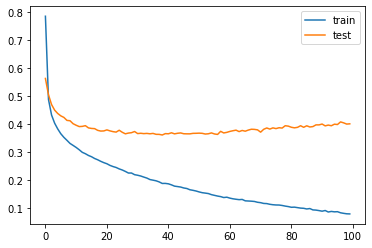

In [190]:
plt.plot(Histoy.history['loss'], label='train')
plt.plot(Histoy.history['val_loss'], label='test')
plt.legend()
plt.show()

In [175]:
Histoy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [191]:
model_tanh = Sequential()
model_tanh.add(Flatten(input_shape=(28,28)))
model_tanh.add(Dense(1000, activation='relu',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_tanh.add(Dense(1000, activation='relu',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_tanh.add(Dense(10, activation='softmax', kernel_initializer='random_normal',bias_initializer='random_normal'))

# compile model
optimizer = keras.optimizers.Adam(lr=1e-5)
model_tanh.compile(optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

Histoy=model_tanh.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
1875/1875 [==============================] - 26s 14ms/step - loss: 67.3341 - accuracy: 0.5755 - val_loss: 12.3030 - val_accuracy: 0.7683
Epoch 2/100
1875/1875 [==============================] - 28s 15ms/step - loss: 9.1531 - accuracy: 0.8022 - val_loss: 9.8715 - val_accuracy: 0.7857
Epoch 3/100
1875/1875 [==============================] - 27s 14ms/step - loss: 6.8083 - accuracy: 0.8247 - val_loss: 7.8041 - val_accuracy: 0.8128
Epoch 4/100
1875/1875 [==============================] - 27s 14ms/step - loss: 5.3211 - accuracy: 0.8388 - val_loss: 7.1447 - val_accuracy: 0.8049
Epoch 5/100
1875/1875 [==============================] - 26s 14ms/step - loss: 4.4752 - accuracy: 0.8480 - val_loss: 8.3465 - val_accuracy: 0.7886
Epoch 6/100
1875/1875 [==============================] - 25s 13ms/step - loss: 3.6845 - accuracy: 0.8618 - val_loss: 5.9544 - val_accuracy: 0.8221
Epoch 7/100
1875/1875 [==============================] - 24s 13ms/step - loss: 3.2075 - accuracy: 0.8697 - val_loss:

In [192]:
max(Histoy.history['val_accuracy'])

0.8658000230789185

In [182]:
Histoy.history['val_loss'][18]

0.8621000051498413

In [189]:
Histoy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

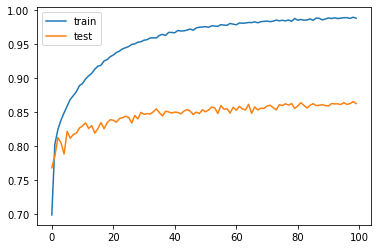

In [193]:
plt.plot(Histoy.history['accuracy'], label='train')
plt.plot(Histoy.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [195]:
model_tanh = Sequential()
model_tanh.add(Flatten(input_shape=(28,28)))
model_tanh.add(Dense(10, activation='relu',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_tanh.add(Dense(10, activation='relu',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_tanh.add(Dense(10, activation='softmax', kernel_initializer='random_normal',bias_initializer='random_normal'))

# compile model
optimizer = keras.optimizers.Adam(lr=1e-5)
model_tanh.compile(optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

Histoy=model_tanh.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3470 - accuracy: 0.1666 - val_loss: 1.7404 - val_accuracy: 0.3638
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6231 - accuracy: 0.3990 - val_loss: 1.3247 - val_accuracy: 0.5460
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2641 - accuracy: 0.5521 - val_loss: 1.1401 - val_accuracy: 0.5724
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0910 - accuracy: 0.5798 - val_loss: 0.9075 - val_accuracy: 0.6663
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8514 - accuracy: 0.6829 - val_loss: 0.7872 - val_accuracy: 0.6978
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7552 - accuracy: 0.7113 - val_loss: 0.7432 - val_accuracy: 0.7207
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7202 - accuracy: 0.7256 - val_loss: 0.7113 - val_ac

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4369 - accuracy: 0.8421 - val_loss: 0.4785 - val_accuracy: 0.8296
Epoch 58/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4357 - accuracy: 0.8448 - val_loss: 0.4780 - val_accuracy: 0.8303
Epoch 59/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4377 - accuracy: 0.8451 - val_loss: 0.4757 - val_accuracy: 0.8293
Epoch 60/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4319 - accuracy: 0.8459 - val_loss: 0.4788 - val_accuracy: 0.8279
Epoch 61/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4387 - accuracy: 0.8442 - val_loss: 0.4733 - val_accuracy: 0.8315
Epoch 62/100
1875/1875 [==============================] - 2s 989us/step - loss: 0.4350 - accuracy: 0.8442 - val_loss: 0.4721 - val_accuracy: 0.8319
Epoch 63/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4279 - accuracy: 0.8476 - val_loss: 0.4716 - val_accura

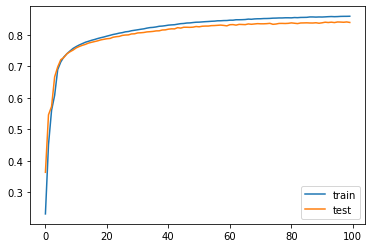

In [196]:
plt.plot(Histoy.history['accuracy'], label='train')
plt.plot(Histoy.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [198]:
test_loss, train_acc = model_tan.evaluate(x_train,  y_train, verbose=2)

test_loss, test_acc = model_tan.evaluate(x_test,  y_test, verbose=2)


1875/1875 - 2s - loss: 0.8132 - accuracy: 0.7067
313/313 - 0s - loss: 0.8363 - accuracy: 0.6972


### 1000 1000 1000 relu

In [199]:
model_tanh = Sequential()
model_tanh.add(Flatten(input_shape=(28,28)))
model_tanh.add(Dense(1000, activation='relu',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_tanh.add(Dense(1000, activation='relu',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_tanh.add(Dense(1000, activation='relu',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_tanh.add(Dense(10, activation='softmax', kernel_initializer='random_normal',bias_initializer='random_normal'))

# compile model
optimizer = keras.optimizers.Adam(lr=1e-5)
model_tanh.compile(optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

Histoy=model_tanh.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
1875/1875 [==============================] - 44s 23ms/step - loss: 34.8391 - accuracy: 0.6368 - val_loss: 11.4807 - val_accuracy: 0.7798
Epoch 2/100
1875/1875 [==============================] - 41s 22ms/step - loss: 8.2757 - accuracy: 0.8075 - val_loss: 9.2400 - val_accuracy: 0.7899
Epoch 3/100
1875/1875 [==============================] - 37s 20ms/step - loss: 5.7776 - accuracy: 0.8351 - val_loss: 7.5726 - val_accuracy: 0.8119
Epoch 4/100
1875/1875 [==============================] - 37s 20ms/step - loss: 4.5213 - accuracy: 0.8518 - val_loss: 6.5929 - val_accuracy: 0.8189
Epoch 5/100
1875/1875 [==============================] - 39s 21ms/step - loss: 3.5487 - accuracy: 0.8660 - val_loss: 6.1401 - val_accuracy: 0.8286
Epoch 6/100
1875/1875 [==============================] - 40s 21ms/step - loss: 3.0489 - accuracy: 0.8722 - val_loss: 5.8867 - val_accuracy: 0.8286
Epoch 7/100
1875/1875 [==============================] - 44s 24ms/step - loss: 2.5344 - accuracy: 0.8834 - val_loss:

KeyboardInterrupt: 

In [201]:

import tensorflow as tf
from tensorflow import keras 
from  tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import keras

model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1000, activation='tanh',kernel_initializer='random_normal',bias_initializer='random_normal'))
model.add(Dense(1000, activation='tanh',kernel_initializer='random_normal',bias_initializer='random_normal'))
model.add(Dense(10, activation='softmax', kernel_initializer='random_normal',bias_initializer='random_normal'))

# compile model
optimizer = keras.optimizers.Adam(lr=1e-5)
model.compile(optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 24s 13ms/step - loss: 1.1452 - accuracy: 0.6035
Epoch 2/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4996 - accuracy: 0.8240
Epoch 3/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4394 - accuracy: 0.8436
Epoch 4/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4055 - accuracy: 0.8564
Epoch 5/100
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3846 - accuracy: 0.8634
Epoch 6/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3695 - accuracy: 0.8663
Epoch 7/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3482 - accuracy: 0.8768
Epoch 8/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3416 - accuracy: 0.8792
Epoch 9/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3291 - accuracy: 0.8835
Epoch 10/100
1875/1875 [==============================]